# Вариант 5(Задача 1)

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

### Описание датасета

Набор данных содержит несколько параметров, которые считаются важными при подаче заявки на магистерские программы.
Параметры:

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/Users/kovalenkov/Documents/Бауманка/3 курс/6 семестр/ТМО/Machine_learning_technologies/Admission_Predict.csv'
ds = pd.read_csv(filename)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
ds = pd.DataFrame(ds)
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.50,4.50,9.65,1,0.92
1,2,324,107,4,4.00,4.50,8.87,1,0.76
2,3,316,104,3,3.00,3.50,8.00,1,0.72
3,4,322,110,3,3.50,2.50,8.67,1,0.80
4,5,314,103,2,2.00,3.00,8.21,0,0.65


In [4]:
# размер датасета
ds.shape

(400, 9)

In [5]:
# проверим наличие пустых значений
for col in ds.columns:
    temp_null_count = ds[ds[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


Датасет не имеет пустых значений

In [6]:
# Основные статистические характеристки набора данных
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,200.50,316.81,107.41,3.09,3.40,3.45,8.60,0.55,0.72
std,115.61,11.47,6.07,1.14,1.01,0.90,0.60,0.50,0.14
min,1.00,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,100.75,308.00,103.00,2.00,2.50,3.00,8.17,0.00,0.64
50%,200.50,317.00,107.00,3.00,3.50,3.50,8.61,1.00,0.73
75%,300.25,325.00,112.00,4.00,4.00,4.00,9.06,1.00,0.83
max,400.00,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


In [9]:
# уникальные значения для целевого признака
ds['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

### Joinplot

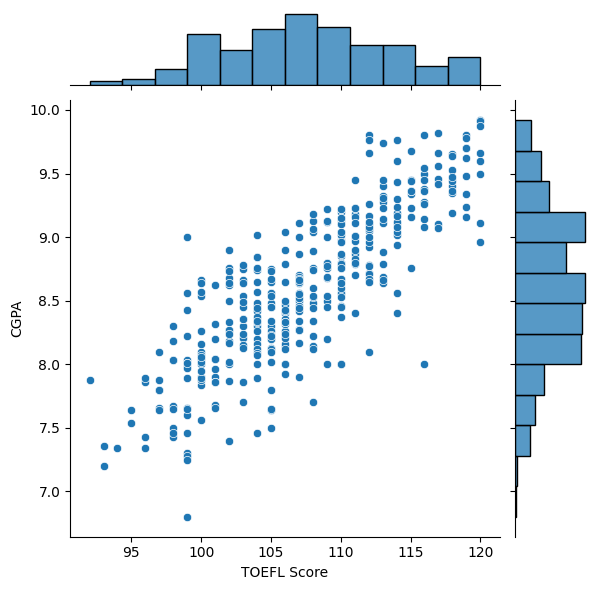

In [12]:
sns.jointplot(x='TOEFL Score', y='CGPA', data=ds)

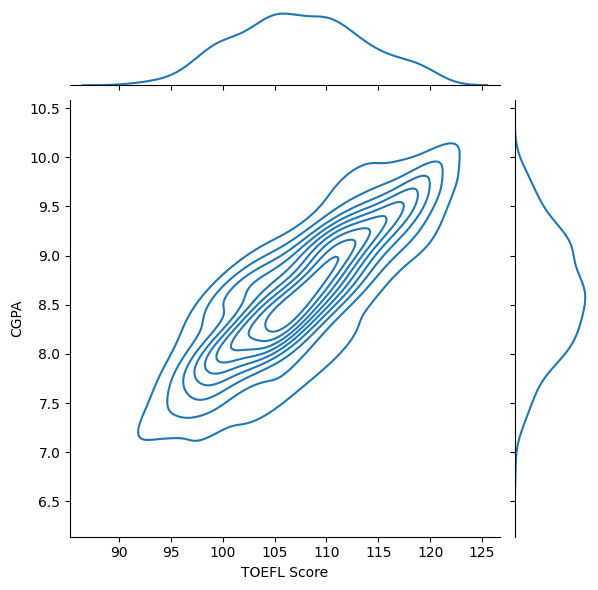

In [13]:
sns.jointplot(x='TOEFL Score', y='CGPA', data=ds, kind="kde")

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

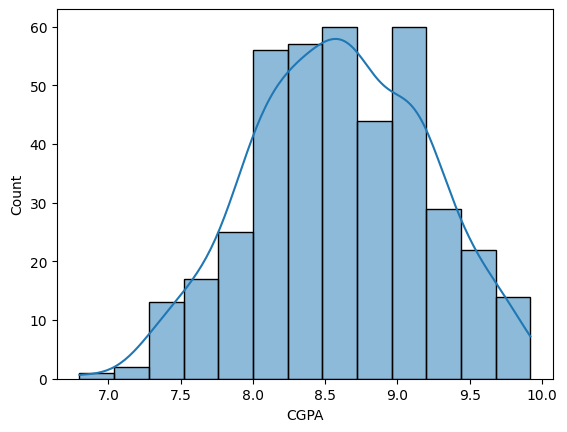

In [14]:
sns.histplot(ds['CGPA'], kde=True)

<AxesSubplot:xlabel='CGPA'>

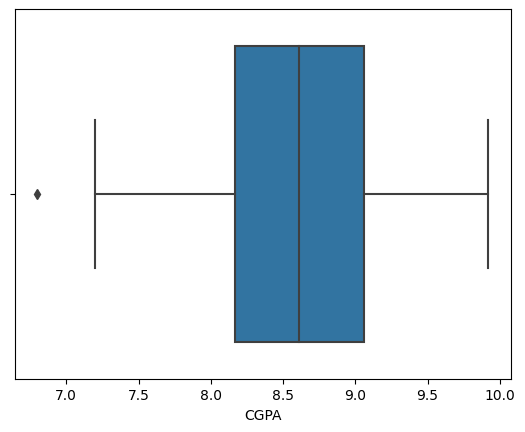

In [15]:
sns.boxplot(x=ds['CGPA'])

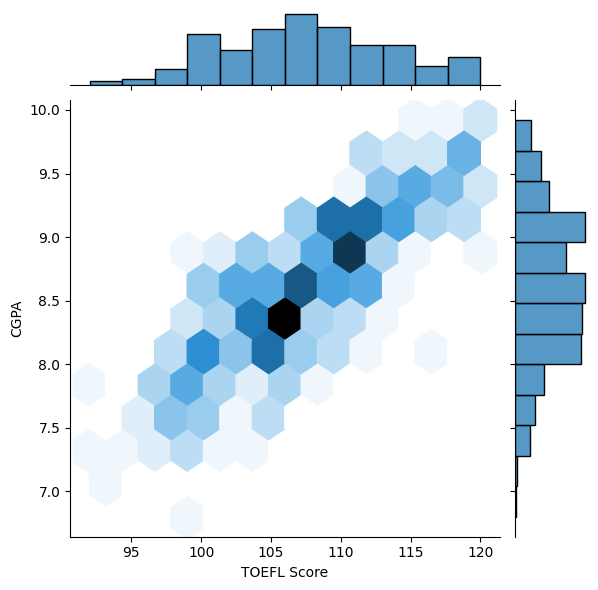

In [16]:
sns.jointplot(x='TOEFL Score', y='CGPA', data=ds, kind="hex")

## Корреляционный анализ

In [18]:
ds.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.00,-0.10,-0.15,-0.17,-0.17,-0.09,-0.05,-0.06,0.04
GRE Score,-0.10,1.00,0.84,0.67,0.61,0.56,0.83,0.58,0.80
TOEFL Score,-0.15,0.84,1.00,0.70,0.66,0.57,0.83,0.49,0.79
University Rating,-0.17,0.67,0.70,1.00,0.73,0.66,0.75,0.45,0.71
SOP,-0.17,0.61,0.66,0.73,1.00,0.73,0.72,0.44,0.68
LOR,-0.09,0.56,0.57,0.66,0.73,1.00,0.67,0.40,0.67
CGPA,-0.05,0.83,0.83,0.75,0.72,0.67,1.00,0.52,0.87
Research,-0.06,0.58,0.49,0.45,0.44,0.40,0.52,1.00,0.55
Chance of Admit,0.04,0.80,0.79,0.71,0.68,0.67,0.87,0.55,1.00


На основе корреляционной матрицы можно сделать следующие выводы:
1. Целевой признак наиболее сильно коррелирует с признаками CGPA(0,87), GRE Score(0,80), TOEFL Score(0,79). Эти признаки должны остаться в модели.
2. Целевой признак коррелирует с признаком Research(0,55) слабее всего(не считая сериийного номера), но его также следует оставить.
3. Serial no. стоит исключить из построения модели, так это просто номер по списку. 
4. Все признаки хорошо коррелируются(кроме Serial no.) с целевым признаком, все признаки будут влиять на модель обучения.